# 5.1 Raeding CEL files

The CEL file contains all the intensity-related information of the pixels on the array. The files
include the intensity itself, the standard deviation, the number of pixels, and other meta
information. To get a feel of the file, we can open the CEL file with any text editor and take a
look at it. Each experiment usually has more than one sample and replicates; therefore, there
will be one CEL file present for each sample or replicated file. The CEL files must be read to
get the data in a workable format in the R workspace. This recipe will explain how we can read
such a file in the R workspace.

CEL文件包含阵列上像素的所有与强度相关的信息。 CEL文件包括强度本身、标准差、像素数等元素信息。要读取该文件，我们可以使用任何文本编辑器打开CEL文件，并查看它。每个实验通常会有很多个样本和重复性，而CEL文件就是记录一个为每个样本或重复。读取CEL文件可以使用特定的格式获取数据。

1. Download GSE24460 from NCBI GEO (http://www.ncbi.nlm.nih.gov/geo/
query/acc.cgi?acc=GSE24460). This gives you a file named GSE24460_RAW.
tar in your desired directory.
 
 从NCBI GEO （ https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE24460 ） 下载GSE24460文件。并把该文件放在当前文件夹。

2. Unzip this file to get CEL files. The files have also been provided with the code files
(available on book's web page) the sub directory <GSE24460_RAW>.

 解压这个文件，该文件还提供了一些子文件。

3. Next, install and load the affy library into the R session as follows:

   安装并加载affy。

In [1]:
BiocManager::install(c("affy"))

Bioconductor version 3.8 (BiocManager 1.30.1), R 3.5.1 (2018-07-02)
Installing package(s) 'affy'
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'affy' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp0sdZT3\downloaded_packages


Update old packages: 'ade4', 'ape', 'backports', 'BH', 'Biobase',
  'BiocInstaller', 'BiocManager', 'BiocParallel', 'biomaRt', 'Biostrings',
  'broom', 'callr', 'caret', 'checkpoint', 'class', 'cli', 'clipr',
  'clusterProfiler', 'codetools', 'colorspace', 'curl', 'data.table', 'dbplyr',
  'ddalpha', 'digest', 'dimRed', 'doParallel', 'DOSE', 'dplyr', 'enrichplot',
  'evaluate', 'fansi', 'fgsea', 'forcats', 'foreign', 'GenomeInfoDb',
  'GenomicFeatures', 'ggplot2', 'GOSemSim', 'haven', 'htmlwidgets', 'httpuv',
  'httr', 'igraph', 'ipred', 'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab',
  'knitr', 'later', 'lattice', 'lava', 'magic', 'markdown', 'MASS', 'Matrix',
  'mgcv', 'mime', 'MKmisc', 'ModelMetrics', 'modelr', 'muscle', 'openssl',
  'pillar', 'pkgconfig', 'pls', 'processx', 'purrr', 'qvalue', 'R6', 'Rcpp',
  'readr', 'readxl', 'recipes', 'repr', 'reprex', 'rlang', 'rmarkdown',
  'robustbase', 'Rsamtools', 'rstudioapi', 'RUnit', 'scales', 'sfsmisc',
  'shiny', 'stringi', 'stringr', 

In [3]:
library(affy)

4. To read all the files in the directory, use the ReadAffy function as follows:

   读取该目录下所有文件，用ReadAffy函数

In [4]:
myData <- ReadAffy(celfile.path="C:/Users/Administrator/bioinformatics_with_R/chapter5/GSE24460_RAW")

In [5]:
myData

Warning message:
"replacing previous import 'BiocGenerics::dims' by 'Biobase::dims' when loading 'AnnotationDbi'"Warning message:
"replacing previous import 'AnnotationDbi::tail' by 'utils::tail' when loading 'hgu133a2cdf'"Warning message:
"replacing previous import 'AnnotationDbi::head' by 'utils::head' when loading 'hgu133a2cdf'"


AffyBatch object
size of arrays=732x732 features (19 kb)
cdf=HG-U133A_2 (22277 affyids)
number of samples=4
number of genes=22277
annotation=hgu133a2
notes=

5. If you wish to read only one or a couple of files, specify the filename as follows:
   
   如果想要读取一个文件或一些文件，直接使用filename参数。

In [6]:
myData1 <- ReadAffy(filenames="GSM602659_MCF72.CEL",celfile.path="C:/Users/Administrator/bioinformatics_with_R/chapter5/GSE24460_RAW")

In [7]:
myData1

AffyBatch object
size of arrays=732x732 features (18 kb)
cdf=HG-U133A_2 (22277 affyids)
number of samples=1
number of genes=22277
annotation=hgu133a2
notes=

# 5.3 Handing the AffyBatch object

The AffyBatch object will be used throughout the chapter for data analysis purposes. As we
have seen, it can be created by reading the CEL files for an experiment together with the other
allocated information. The AffyBatch object has various components. This recipe aims to
look at the various components of such an object.

AffyBatch对象将在整个章节中用于数据分析目的。正如我们所看到的，可以通过读取用于实验的CEL文件以及其他分配的信息来创建它。AffyBatch对象有各种组件。这个教程旨在查看此类对象的各种组件。

1. Check an AffyBatch object by simply typing in the object name as  follows:

 检查AffyBatch对象：

In [8]:
myData 

AffyBatch object
size of arrays=732x732 features (19 kb)
cdf=HG-U133A_2 (22277 affyids)
number of samples=4
number of genes=22277
annotation=hgu133a2
notes=

2. Check the structure of the object as follows:

   检查AffyBatch对象结构：

In [7]:
str(myData)

Formal class 'AffyBatch' [package "affy"] with 10 slots
  ..@ cdfName          : chr "HG-U133A_2"
  ..@ nrow             : Named int 732
  .. ..- attr(*, "names")= chr "Rows"
  ..@ ncol             : Named int 732
  .. ..- attr(*, "names")= chr "Cols"
  ..@ assayData        :<environment: 0x0000000026a86370> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	1 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr "arbitrary numbering"
  .. .. ..@ data             :'data.frame':	4 obs. of  1 variable:
  .. .. .. ..$ sample: int [1:4] 1 2 3 4
  .. .. ..@ dimLabels        : chr [1:2] "sampleNames" "sampleColumns"
  .. .. ..@ .__classVersion__:Formal class 'Versions' [package "Biobase"] with 1 slot
  .. .. .. .. ..@ .Data:List of 1
  .. .. .. .. .. ..$ : int [1:3] 1 1 0
  ..@ featureData      :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':

3. Check the phenotype data of the object using the pData and phenoData functions as follows:

 通过用pData和phenoData函数检查AffyBatch对象的表型数据：

In [8]:
pData(myData)

,sample
GSM602658_MCF71.CEL,1
GSM602659_MCF72.CEL,2
GSM602660_MCF7226ng.CEL,3
GSM602661_MCF7262ng.CEL,4


In [9]:
phenoData(myData)

An object of class 'AnnotatedDataFrame'
  sampleNames: GSM602658_MCF71.CEL GSM602659_MCF72.CEL
    GSM602660_MCF7226ng.CEL GSM602661_MCF7262ng.CEL
  varLabels: sample
  varMetadata: labelDescription

4. To get the exprssion data as a matrix, use the exprs function as follows:

 用exprs函数获取表达信息数据矩阵：

In [10]:
exprs(myData)

,GSM602658_MCF71.CEL,GSM602659_MCF72.CEL,GSM602660_MCF7226ng.CEL,GSM602661_MCF7262ng.CEL
1,88,93,81,207
2,7068,5899,3602,2931
3,99,91,94,188
4,7452,6565,3850,3297
5,87,143,119,159
6,80,76,92,213
7,7794,6193,3879,3648
8,101,99,87,194
9,7493,6344,3792,3364
10,95,90,87,214


These values can be written to a separate file using the write.csv function.

 这些值可以用write.csv函数来写入变成另一个文件。

5. Use the following annotation function to get the annotation name of the object:

 用annotation函数来获取这AffyBatch对象的注释名称

In [11]:
annotation(myData)

[1] "hgu133a2"

6. To get the probe names or sample names the data, use the probeNames and sampleNames functions as follows:

 获取probe名称或样本名称数据，用probeNamessampleNames函数

In [ ]:
probeNames(myData)

In [17]:
sampleNames(myData)

The AffyBatch object has a complex structure that consists of many components and
subcomponents, as observed while looking at the structure of the object. At every step of the
recipe, we check individual components of the complete AffyBatch object. The components
of the AffyBatch object, such as expression data, can be extracted and written into a
separate file using the write.csv or similar functions.

AffyBatch对象具有一个复杂的结构，由许多组件和子组件组成，这是在查看对象的结构时观察到的。在教程的每个步骤中，我们检查完整AffyBatch对象的各个组件。AffyBatch对象的组件(如表达式数据)可以使用write.csv或类似的函数提取并写入单独的文件中。

# 5.4 Checking the quality of data

The quality of data can be affected at each step of the microarray experiment pipeline. Quality-related problems could stem from hybridization due to uneven fluorescence on the chip that causes variable intensity distributions. A nonspecific binding or other biological/ technical reasons can create background noise in the data. Another possible situation can be an inappropriate experimental design that may affect the dataset as a whole. Using such data will result in wrongful or inconclusive inference during data analysis. Therefore, as analysts we must  ensure the data quality before we begin the data analysis. This is achieved by looking for outlying arrays, distributions within arrays, batch effects, and so on. There are various analyses and diagnostic plots that can be used to compute these measures that explain the quality of array data under analysis. This recipe will explain various diagnostic steps for the quality check of data.

微阵列实验的每一步都会影响数据的质量。与质量有关的问题可能源于杂交，因为芯片上的荧光不均匀，导致强度分布变化。非特定的绑定或其他生物/技术原因可能会在数据中产生背景噪声。另一种可能的情况是不适当的实验设计可能会影响整个数据集。在数据分析过程中，使用这些数据会导致错误的或非结论性的推理。因此，作为分析人员，在开始数据分析之前，我们必须确保数据的质量。这是通过查找外围数组、数组中的分布、批处理效果等来实现的。可以使用各种分析和诊断图来计算这些度量，以解释分析中的数组数据的质量。此教程将解释用于数据质量检查的各种诊断步骤。


1. Install and load the arryQualityMetrics library from the Bioconductor repository as follows:

  安装和加载arryQualityMetrics包：

In [1]:
BiocManager::install(c("arrayQualityMetrics"))

Bioconductor version 3.8 (BiocManager 1.30.1), R 3.5.1 (2018-07-02)
Installing package(s) 'arrayQualityMetrics'
also installing the dependencies 'base64', 'checkmate', 'gcrma', 'BeadDataPackR', 'illuminaio', 'Formula', 'acepack', 'htmlTable', 'affyPLM', 'beadarray', 'Biobase', 'Cairo', 'genefilter', 'gridSVG', 'Hmisc', 'hwriter', 'latticeExtra', 'limma', 'setRNG', 'vsn'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'base64' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'gcrma' successfully unpacked and MD5 sums checked
package 'BeadDataPackR' successfully unpacked and MD5 sums checked
package 'illuminaio' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'affyPLM' successfully unpacked and MD5 sums checked
package 'beadarray' successfully unpacked and MD5 sums checked
package 'Biobase' successfully unpacked and MD5 sums checked
package 'Cairo' successfully unpacked and MD5 sums checked
package 'genefilter' successfully unpacked and MD5 sums checked
package 'gridSVG' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked
package 'hwriter' successfully unpacked and MD5 sums checked
package 'latt

Update old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocInstaller',
  'BiocManager', 'biomaRt', 'Biostrings', 'broom', 'callr', 'caret',
  'checkpoint', 'class', 'cli', 'clipr', 'clusterProfiler', 'codetools',
  'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'digest', 'dimRed',
  'doParallel', 'DOSE', 'dplyr', 'enrichplot', 'evaluate', 'fansi', 'fgsea',
  'foreign', 'GenomicFeatures', 'ggplot2', 'GOSemSim', 'haven', 'htmlwidgets',
  'httpuv', 'httr', 'igraph', 'ipred', 'IRdisplay', 'IRkernel', 'jsonlite',
  'kernlab', 'knitr', 'later', 'lattice', 'lava', 'magic', 'markdown', 'MASS',
  'Matrix', 'mgcv', 'mime', 'MKmisc', 'ModelMetrics', 'modelr', 'muscle',
  'openssl', 'pillar', 'pkgconfig', 'pls', 'processx', 'purrr', 'qvalue', 'R6',
  'Rcpp', 'readr', 'readxl', 'recipes', 'repr', 'reprex', 'rlang', 'rmarkdown',
  'robustbase', 'Rsamtools', 'rstudioapi', 'RUnit', 'scales', 'sfsmisc',
  'shiny', 'stringi', 'stringr', 'survival', 'testthat', 'tibble', 'tidyr',
  'tidyselect

In [2]:
source("http://bioconductor.org/biocLite.R")
options(BioC_mirror="http://mirrors.ustc.edu.cn/bioc/")
biocLite("limma")

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: http://mirrors.ustc.edu.cn/bioc/
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'limma'


package 'limma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpmwozxl\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'broom',
  'callr', 'caret', 'checkpoint', 'class', 'cli', 'clipr', 'codetools',
  'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'digest', 'dimRed',
  'doParallel', 'dplyr', 'evaluate', 'fansi', 'forcats', 'foreign', 'geometry',
  'ggplot2', 'haven', 'htmlwidgets', 'httpuv', 'httr', 'igraph', 'ipred',
  'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab', 'knitr', 'later', 'lattice',
  'lava', 'magic', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime', 'MKmisc',
  'ModelMetrics', 'modelr', 'openssl', 'pillar', 'pkgconfig', 'pls',
  'processx', 'purrr', 'R6', 'Rcpp', 'readr', 'readxl', 'recipes', 'repr',
  'reprex', 'rlang', 'rmarkdown', 'robustbase', 'rstudioapi', 'RUnit',
  'scales', 'sfsmisc', 'shiny', 'stringi', 'stringr', 'survival', 'testthat',
  'tibble', 'tidyr', 'tidyselect', 'tinytex', 'TTR', 'xfun', 'XML', 'xtable',
  'xts', 'zoo'


In [7]:
BiocManager::install("vsn")

Bioconductor version 3.8 (BiocManager 1.30.1), R 3.5.1 (2018-07-02)
Installing package(s) 'vsn'
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'vsn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpYThNEh\downloaded_packages


Update old packages: 'ade4', 'ape', 'backports', 'BH', 'Biobase',
  'BiocInstaller', 'BiocManager', 'BiocParallel', 'biomaRt', 'Biostrings',
  'broom', 'callr', 'caret', 'checkpoint', 'class', 'cli', 'clipr',
  'clusterProfiler', 'codetools', 'colorspace', 'curl', 'data.table', 'dbplyr',
  'ddalpha', 'digest', 'dimRed', 'doParallel', 'DOSE', 'dplyr', 'enrichplot',
  'evaluate', 'fansi', 'fgsea', 'forcats', 'foreign', 'GenomeInfoDb',
  'GenomicFeatures', 'ggplot2', 'GOSemSim', 'haven', 'htmlwidgets', 'httpuv',
  'httr', 'igraph', 'ipred', 'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab',
  'knitr', 'later', 'lattice', 'lava', 'magic', 'markdown', 'MASS', 'Matrix',
  'mgcv', 'mime', 'MKmisc', 'ModelMetrics', 'modelr', 'muscle', 'openssl',
  'pillar', 'pkgconfig', 'pls', 'processx', 'purrr', 'qvalue', 'R6', 'Rcpp',
  'readr', 'readxl', 'recipes', 'repr', 'reprex', 'rlang', 'rmarkdown',
  'robustbase', 'Rsamtools', 'rstudioapi', 'RUnit', 'scales', 'sfsmisc',
  'shiny', 'stringi', 'stringr', 

In [9]:
library(arrayQualityMetrics)

2. Use the following arrayQualityMetrics function to create plot to assess the data quality:

  使用以下arrayQualityMetrics函数创建plot来评估数据质量:

In [10]:
arrayQualityMetrics(myData, outdir="quality_assesment")

The report will be written into directory 'quality_assesment'. 
Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"Warning message in svgStyleAttributes(style, svgdev):
"Removing non-SVG style attribute name(s): subscripts, group.number, group.value"(loaded the KernSmooth namespace)
Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth):
"Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'"Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth):
"Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'"Warning message in KernS

3. Go to the created subdirectory (in your case, quality_assesment) in the current workint directory to check the created HTML page(index.html) and plots.

 转到当前workint目录中创建的子目录(在您的示例中是quality_assesment)，检查创建的HTML页面(index.html)和绘图:

4. Open the HTML file in a browser of your choice. Use the following line of code for this purpose:

 在您选择的浏览器中打开HTML文件。为此，请使用下面的代码行:

In [17]:
browseURL(file.path("C:/Users/Administrator/bioinformatics_with_R/chapter5/quality_assesment", "index.html"))

In [15]:
getwd()

[1] "C:/Users/Administrator/bioinformatics_with_R/chapter5"

5. You can create these plots and assessments individually as well. For example, to create an MA plot, use the MAplot function as follows:

 也可以单独创建这些情节和评估。例如，要创建MA图，使用MAplot函数如下:

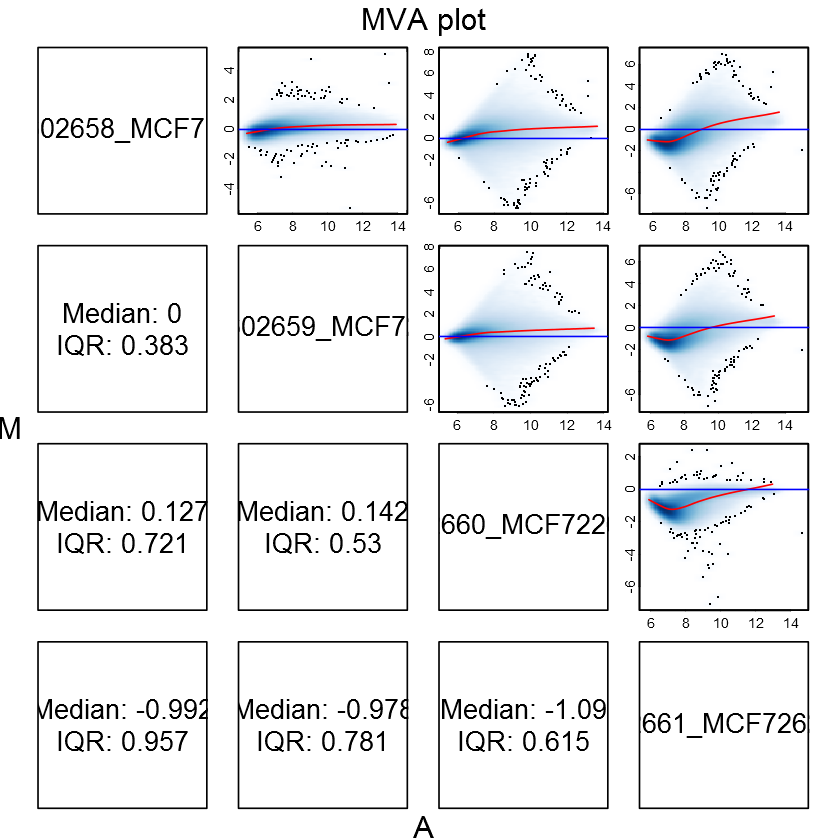

In [19]:
MAplot(myData, pairs=TRUE, plot.method="smoothScatter")

6. To plot the log densities, type in the following command:

 要绘制日志密度，输入以下命令:

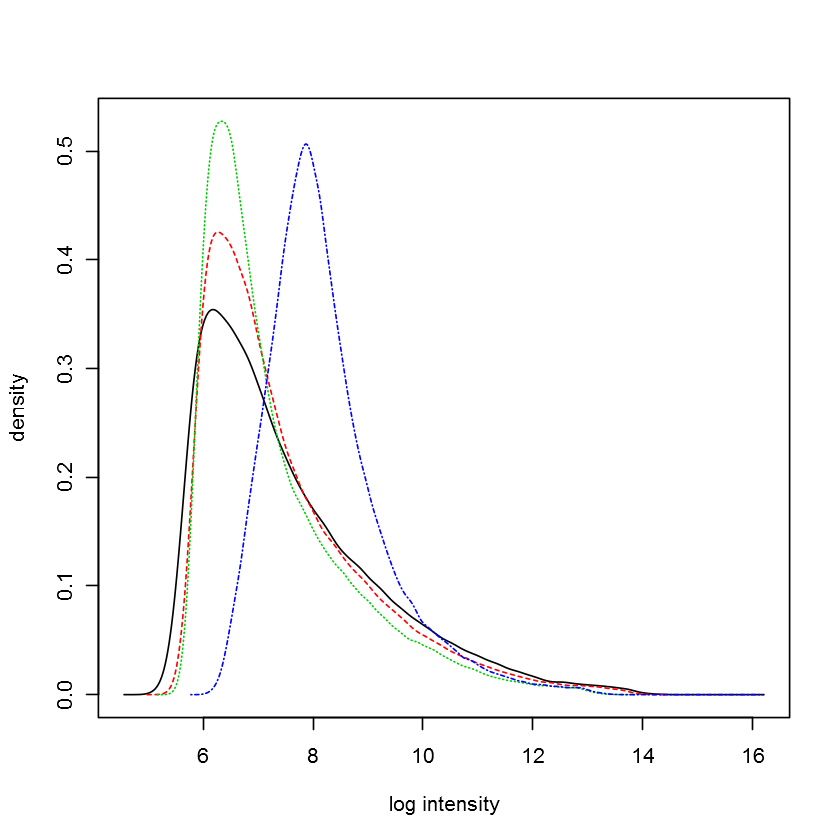

In [20]:
plotDensity.AffyBatch(myData)

7. To create the boxplots, simply use the bisplot function in the AffyBatch object as follows:

 要创建箱线图，只需在AffyBatch对象中使用bisplot函数，如下所示:

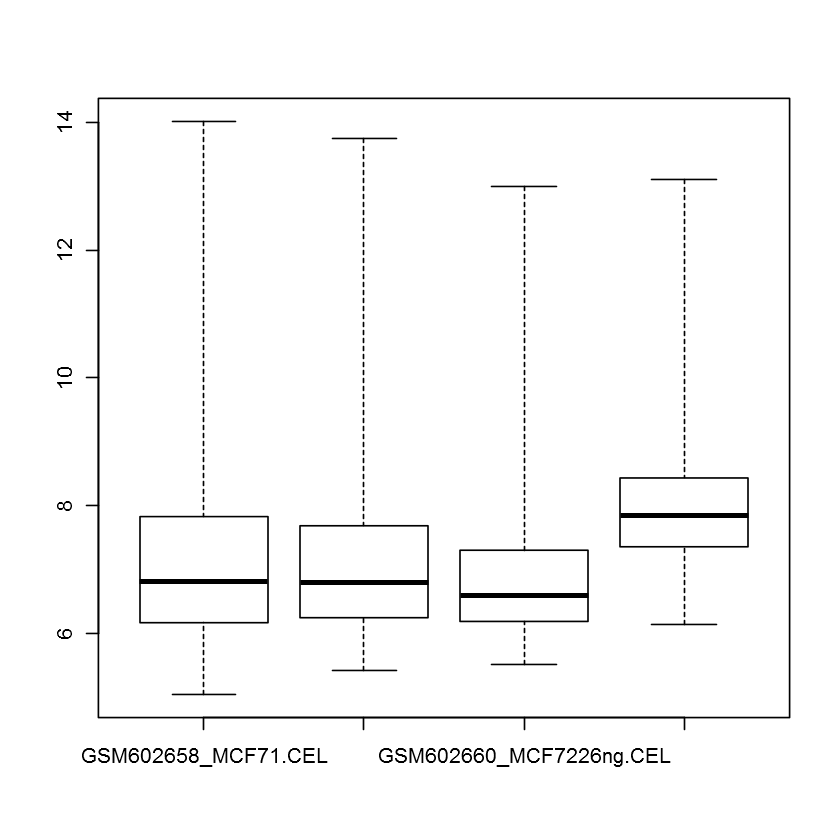

In [21]:
boxplot(myData)

8. To get the RNA degradation plot, use the AffyRNAdeg function and then plotAffyRNAdeg as follows:

利用AffyRNAdeg函数和plotAffyRNAdeg得到RNA降解图如下:

In [22]:
rnaDeg <- AffyRNAdeg(myData)

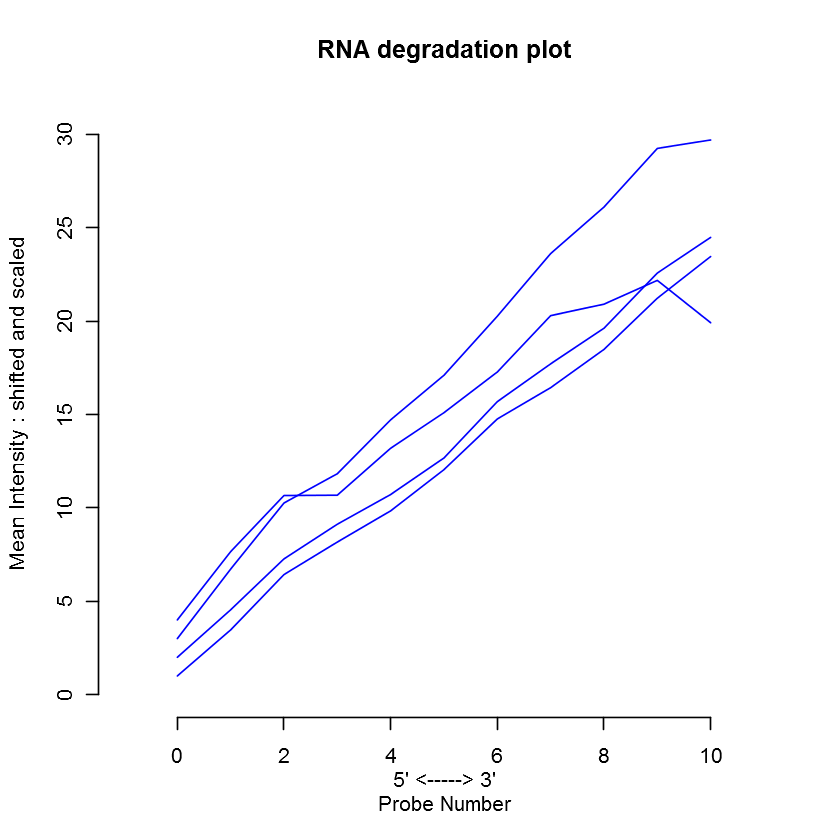

In [23]:
plotAffyRNAdeg(rnaDeg)

9. Check the detail of the rnaDeg object as follows:
   
   如下所示检查rnaDeg对象的详细信息:

In [24]:
summaryAffyRNAdeg(rnaDeg)

,GSM602658_MCF71.CEL,GSM602659_MCF72.CEL,GSM602660_MCF7226ng.CEL,GSM602661_MCF7262ng.CEL
slope,2.19e+00,2.22e+00,2.73e+00,1.74e+00
pvalue,2.87e-13,5.01e-13,3.40e-11,1.51e-06
